In [1]:
using LinearAlgebra
using Winston

In [2]:
numpoints = 36;

# Linear

In [3]:
b, m = rand(2)*3;

x = reshape(collect(range(0, length=numpoints, stop=24)), numpoints, 1);
y = b .+ m*x + 3*randn(numpoints);

In [4]:
function linear_regress(x::Array{Float64, 2}, y::Array{Float64, 2}, learningrate::Float64)
    x = hcat(ones(Float64, size(x)[1]),
             x);
    w = zeros(Float64, size(x)[2], 1);
    while true
        w_old = w;
        grad = ((x' * x) * w) - (x' * y);
        w -= learningrate*grad;
        if norm(w - w_old, 1) < 1e-6
            return w;
        end
    end
end;

In [5]:
b_hat, m_hat = linear_regress(x, y, 1e-6);

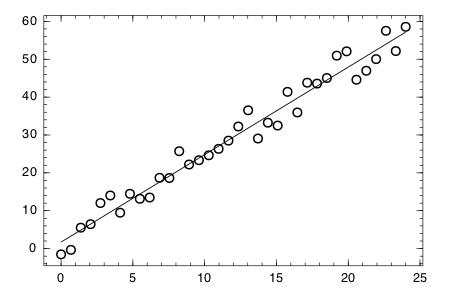

In [6]:
scatter(x, y);
oplot(x, b_hat .+ m_hat*x)

# Quadratic

In [7]:
b, m1, m2 = rand(3)*3;

x = reshape(collect(range(0, length=numpoints, stop=24)), numpoints, 1);
y = b .+ m1*x + m2*x.^2 + 18*randn(numpoints);

In [8]:
function quad_regress(x::Array{Float64, 2}, y::Array{Float64, 2}, learningrate::Float64)
    x = hcat(ones(Float64, size(x)[1]),
             x,
             x.^2);
    w = zeros(Float64, size(x)[2], 1);
    while true
        w_old = w;
        grad = ((x' * x) * w) - (x' * y);
        w -= learningrate*grad;
        if norm(w - w_old, 1) < 1e-6
            return w;
        end
    end
end;

In [9]:
b_hat, m1_hat, m2_hat = quad_regress(x, y, 1e-10);

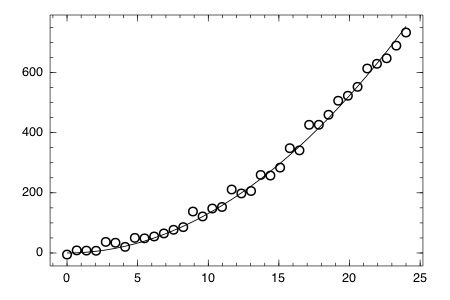

In [10]:
scatter(x, y);
oplot(x, b_hat .+ m1_hat*x + m2_hat*x.^2)